In [1]:
# IPL DATA ANALYSIS FROM 2008 TO 2024

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
d_df=pd.read_csv("deliveries.csv")

In [4]:
d_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
d_df.shape

(260920, 17)

In [6]:
d_df.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [7]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [8]:
d_df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [9]:
d_df.duplicated().sum()

0

In [10]:
d_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [11]:
d_df['extras_type'].value_counts()

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

In [12]:
d_df['player_dismissed'].value_counts()

player_dismissed
RG Sharma      223
V Kohli        207
S Dhawan       193
KD Karthik     184
RV Uthappa     180
              ... 
BJ Haddin        1
SS Cottrell      1
JE Taylor        1
NL McCullum      1
Sunny Gupta      1
Name: count, Length: 629, dtype: int64

In [13]:
d_df['fielder'].value_counts()

fielder
MS Dhoni            220
KD Karthik          199
AB de Villiers      141
RV Uthappa          133
WP Saha             131
                   ... 
TS Mills              1
Ankit Soni            1
WPUJC Vaas            1
B Laughlin            1
T Kohler-Cadmore      1
Name: count, Length: 607, dtype: int64

In [14]:
d_df[['player_dismissed', 'fielder']].describe()

,player_dismissed,fielder
count,12950,9354
unique,629,607
top,RG Sharma,MS Dhoni
freq,223,220


In [15]:
d_df['player_dismissed'].fillna('Not Dismissed', inplace=True)
d_df['dismissal_kind'].fillna('Not Dismissed', inplace=True)
d_df['fielder'].fillna('No Fielder', inplace=True)
d_df['extras_type'].fillna('No Extra', inplace=True)

In [16]:
d_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Dismissed,Not Dismissed,No Fielder
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Dismissed,Not Dismissed,No Fielder
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Not Dismissed,Not Dismissed,No Fielder
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Dismissed,Not Dismissed,No Fielder
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Dismissed,Not Dismissed,No Fielder


In [17]:
d_df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [18]:
d_total=d_df.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
d_total

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [19]:
d_total=d_total[d_total['inning']==1]
d_total

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [21]:
d_df['batting_team'].value_counts()

batting_team
mumbai indians                 31437
kolkata knight riders          29514
chennai super kings            28651
royal challengers bangalore    28205
rajasthan royals               26242
kings xi punjab                22646
sunrisers hyderabad            21843
delhi daredevils               18786
delhi capitals                 10946
deccan chargers                 9034
punjab kings                    6833
gujarat titans                  5494
pune warriors                   5443
lucknow super giants            5400
gujarat lions                   3566
rising pune supergiant          1900
royal challengers bengaluru     1818
kochi tuskers kerala            1582
rising pune supergiants         1580
Name: count, dtype: int64

In [22]:
d_df['batting_team'] = d_df['batting_team'].str.strip()
d_df['bowling_team'] = d_df['bowling_team'].str.strip()

In [23]:
d_df['batting_team'] = d_df['batting_team'].str.lower()
d_df['bowling_team'] = d_df['bowling_team'].str.lower()

In [24]:
d_df['batting_team']=d_df['batting_team'].replace("royal challengers bangalore", "royal challengers bengaluru")
d_df['bowling_team']=d_df['bowling_team'].replace("royal challengers bangalore", "royal challengers bengaluru")

In [25]:
d_df['batting_team']=d_df['batting_team'].replace("rising pune supergiant", "rising pune supergiants")
d_df['bowling_team']=d_df['bowling_team'].replace("rising pune supergiant", "rising pune supergiants")

In [26]:
d_df['batting_team']=d_df['batting_team'].str.replace("kings xi punjab", "punjab kings")
d_df['bowling_team']=d_df['bowling_team'].str.replace("kings xi punjab", "punjab kings")

In [27]:
d_df['batting_team']=d_df['batting_team'].str.replace("gujarat lions", "gujarat titans")
d_df['bowling_team']=d_df['bowling_team'].str.replace("gujarat lions", "gujarat titans")

In [28]:
d_df['batting_team']=d_df['batting_team'].replace("pune warriors","rising pune supergiants")
d_df['bowling_team']=d_df['bowling_team'].replace("pune warriors","rising pune supergiants")

In [29]:
d_df['batting_team']=d_df['batting_team'].replace("delhi daredevils","delhi capitals")
d_df['bowling_team']=d_df['bowling_team'].replace("delhi daredevils","delhi capitals")

In [30]:
d_df['batting_team']=d_df['batting_team'].replace("deccan chargers","sunrisers hyderabad")
d_df['bowling_team']=d_df['bowling_team'].replace("deccan chargers","sunrisers hyderabad")

In [31]:
d_df['batting_team'].value_counts()

batting_team
mumbai indians                 31437
sunrisers hyderabad            30877
royal challengers bengaluru    30023
delhi capitals                 29732
kolkata knight riders          29514
punjab kings                   29479
chennai super kings            28651
rajasthan royals               26242
gujarat titans                  9060
rising pune supergiants         8923
lucknow super giants            5400
kochi tuskers kerala            1582
Name: count, dtype: int64

In [32]:
d_df['batting_team'].unique()

array(['kolkata knight riders', 'royal challengers bengaluru',
       'chennai super kings', 'punjab kings', 'rajasthan royals',
       'delhi capitals', 'mumbai indians', 'sunrisers hyderabad',
       'kochi tuskers kerala', 'rising pune supergiants',
       'gujarat titans', 'lucknow super giants'], dtype=object)

In [33]:
d_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,kolkata knight riders,royal challengers bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Dismissed,Not Dismissed,No Fielder
1,335982,1,kolkata knight riders,royal challengers bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Dismissed,Not Dismissed,No Fielder
2,335982,1,kolkata knight riders,royal challengers bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Not Dismissed,Not Dismissed,No Fielder
3,335982,1,kolkata knight riders,royal challengers bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Dismissed,Not Dismissed,No Fielder
4,335982,1,kolkata knight riders,royal challengers bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Dismissed,Not Dismissed,No Fielder


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

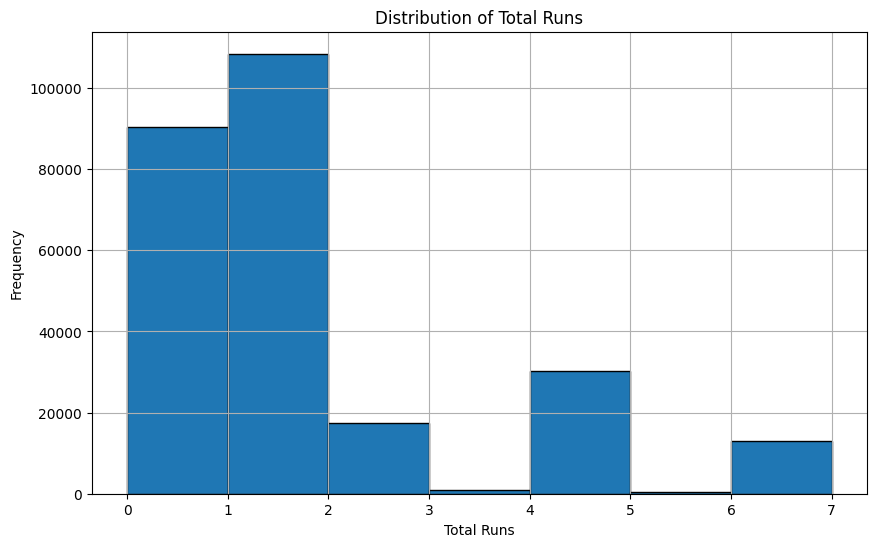

In [41]:
d_df['total_runs'].hist(bins=7, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

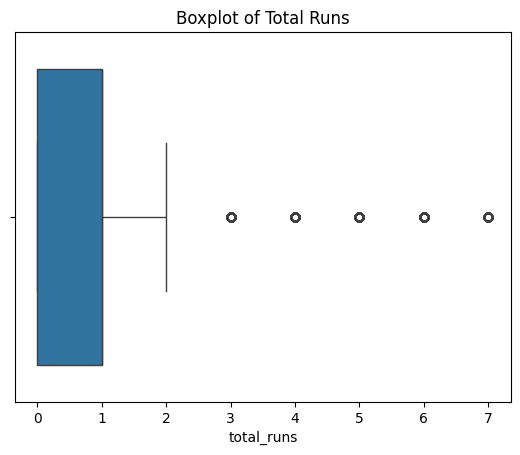

In [42]:
sns.boxplot(x=d_df['total_runs'])
plt.title('Boxplot of Total Runs')
plt.show()

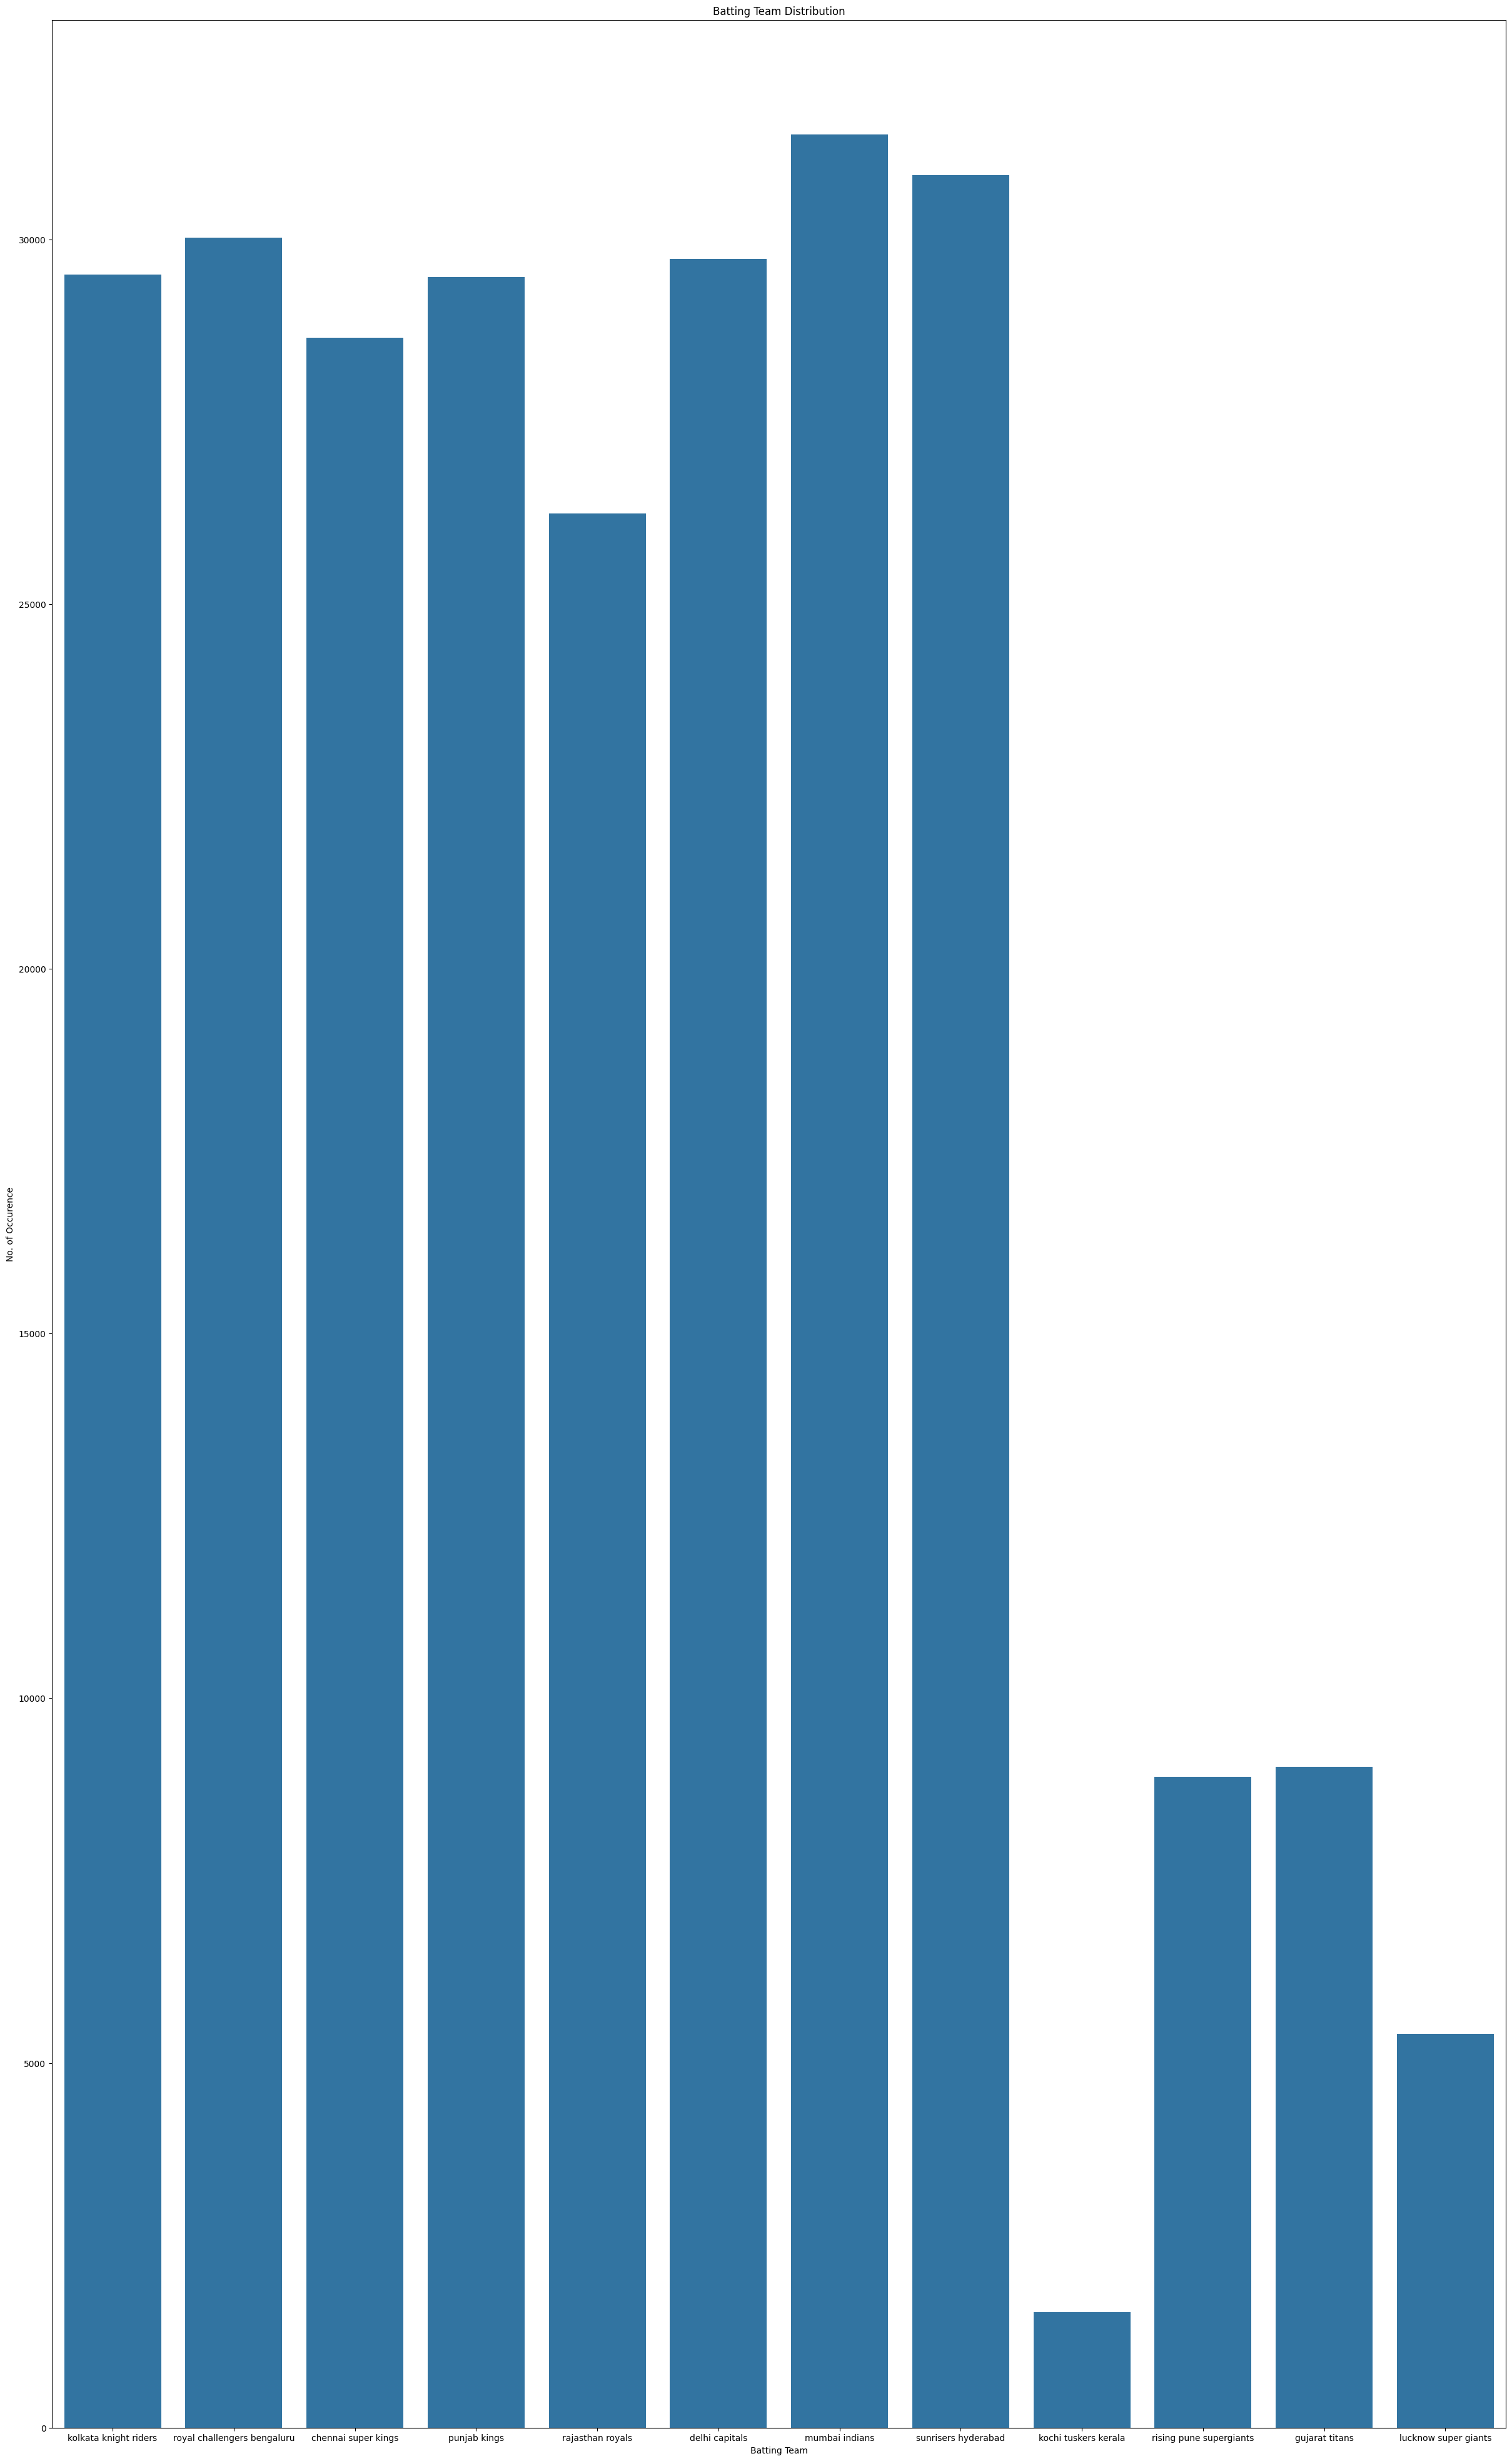

In [43]:
plt.figure(figsize=(30,50))
d_df['batting_team'].value_counts()
sns.countplot(x='batting_team', data=d_df)
plt.xlabel("Batting Team")
plt.ylabel("No. of Occurence")
plt.title('Batting Team Distribution')
plt.show()

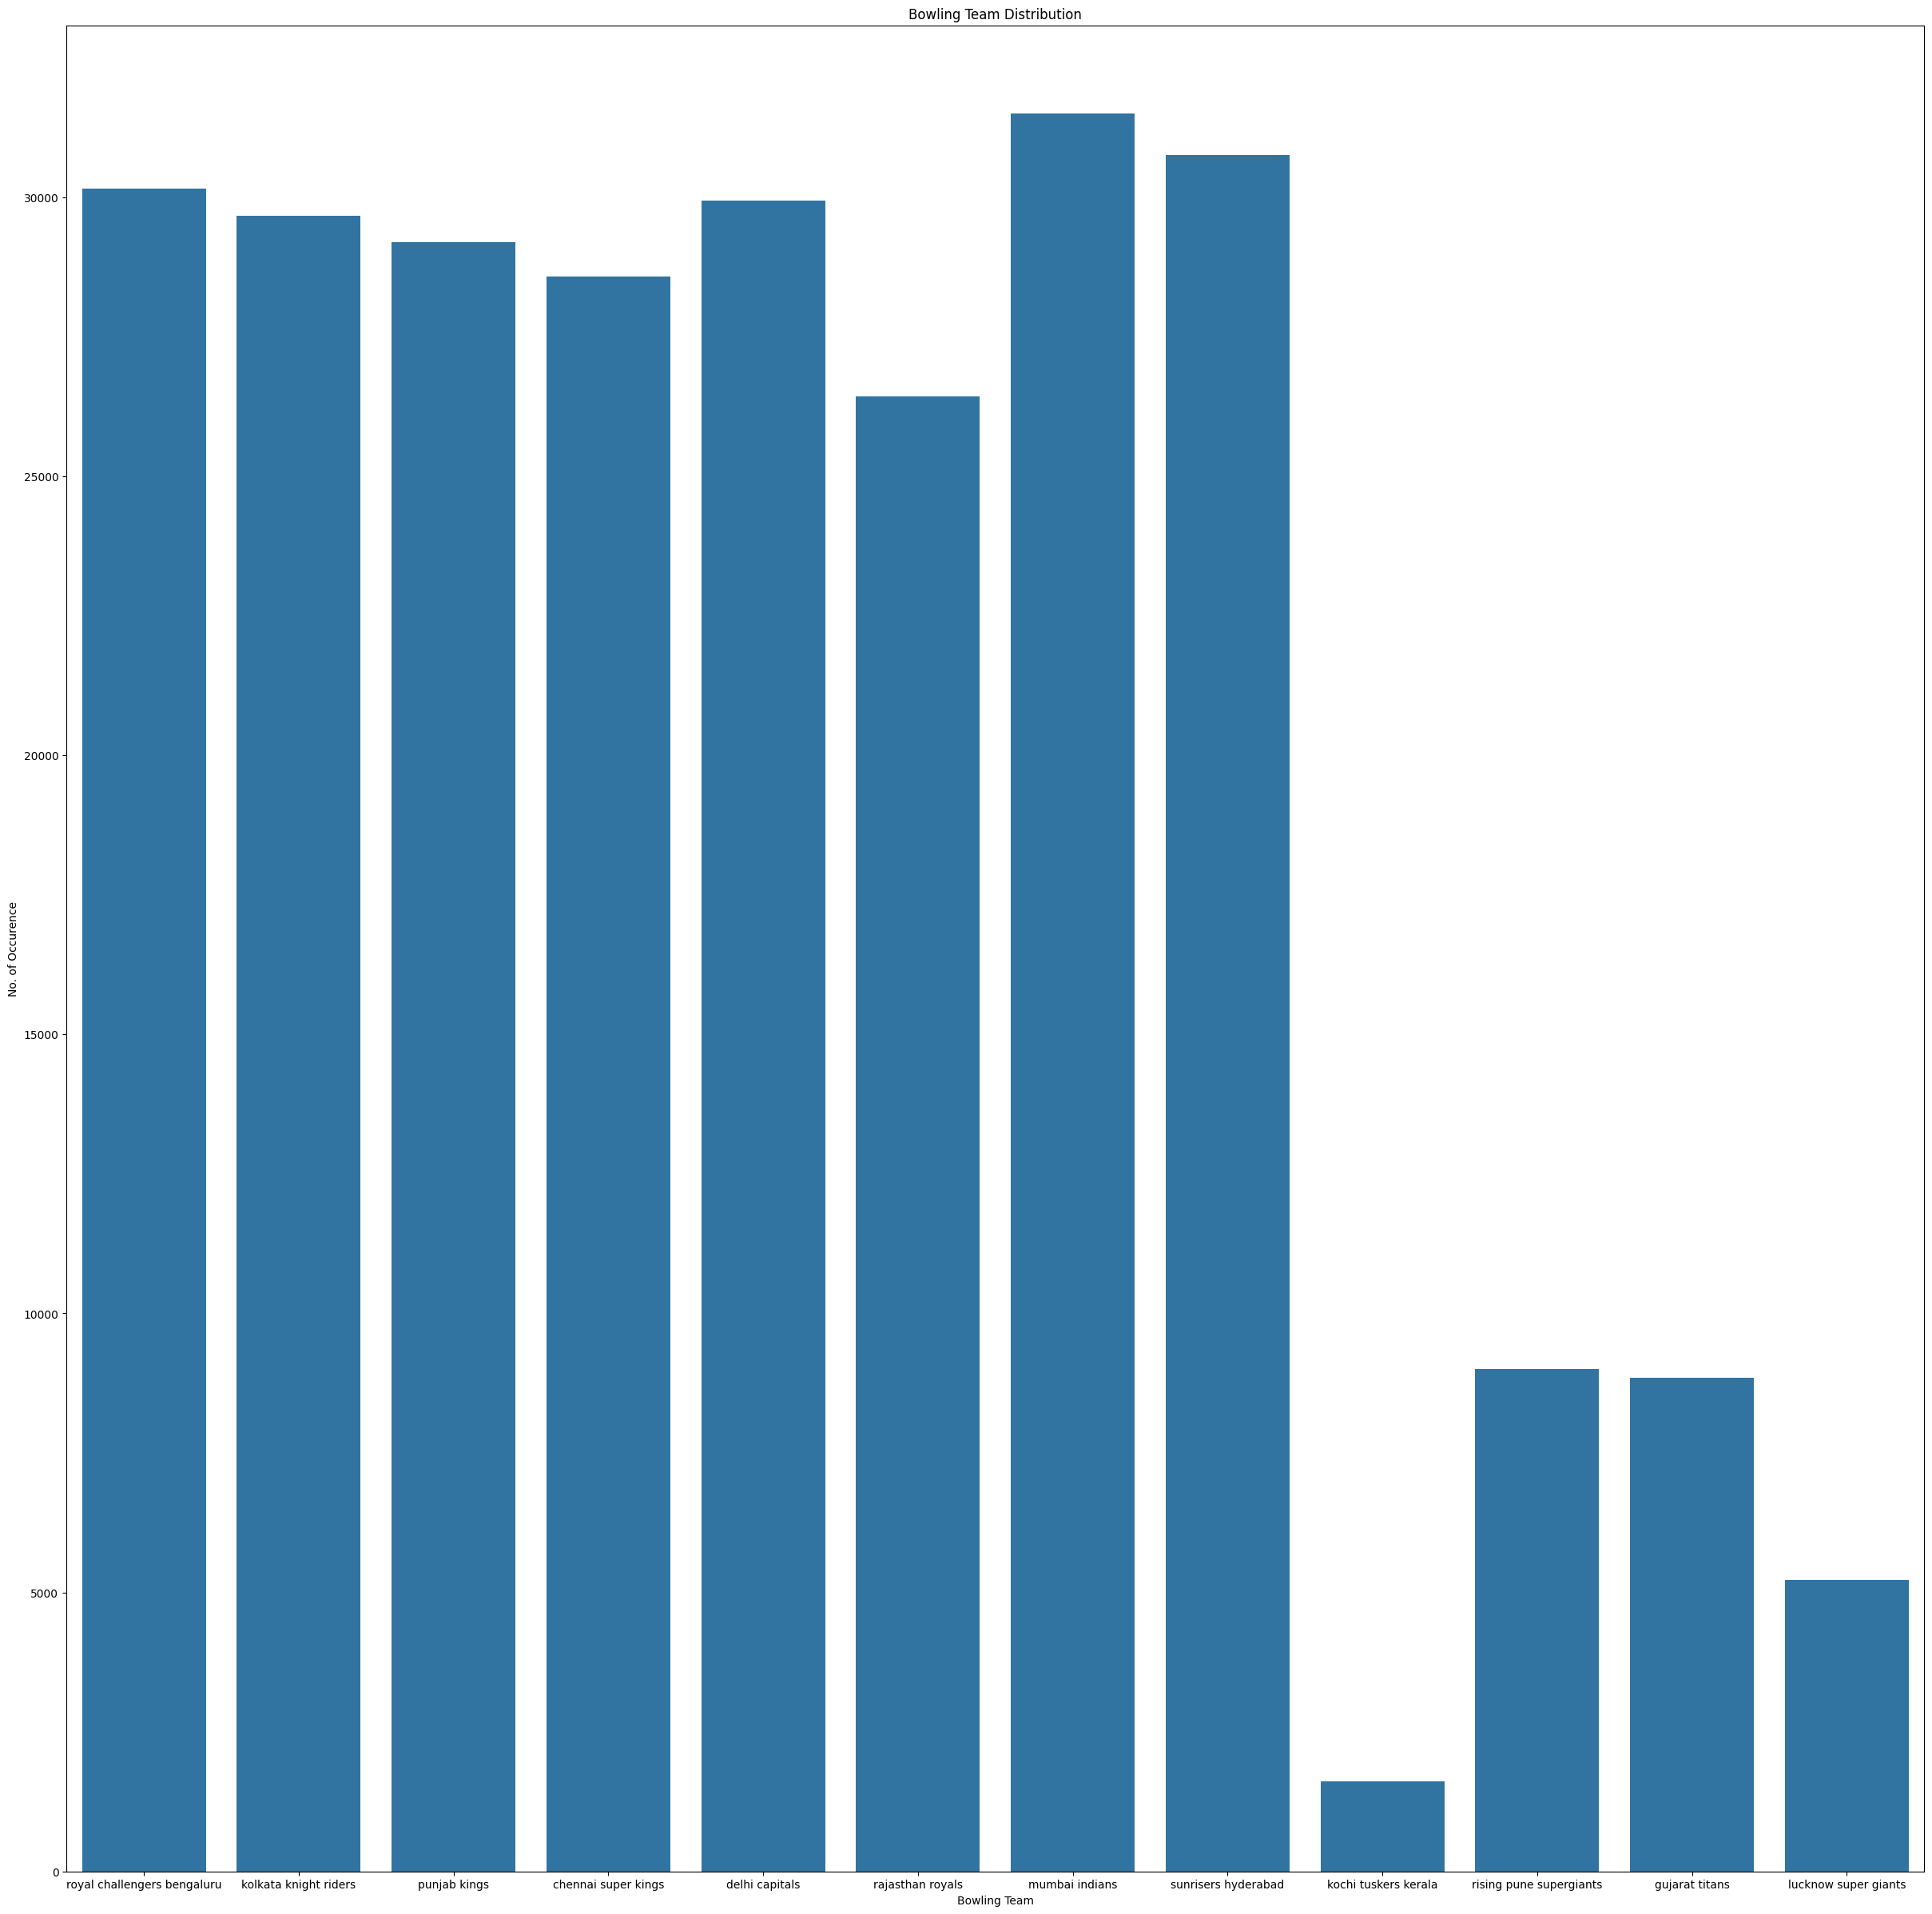

In [44]:
plt.figure(figsize=(30,30))
d_df['bowling_team'].value_counts()
sns.countplot(x='bowling_team', data=d_df)
plt.xlabel("Bowling Team")
plt.ylabel("No. of Occurence")
plt.title('Bowling Team Distribution')
plt.show()

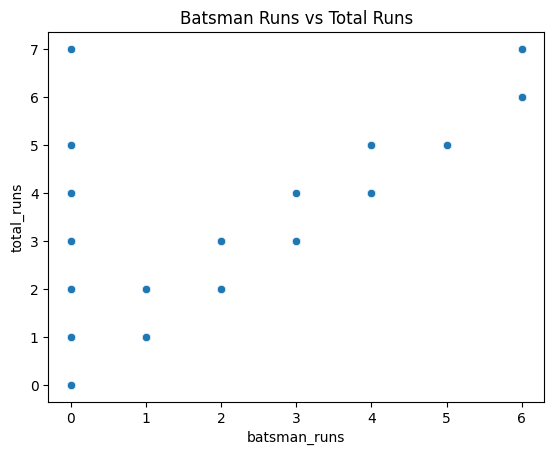

In [45]:
sns.scatterplot(x='batsman_runs', y='total_runs', data=d_df)
plt.title('Batsman Runs vs Total Runs')
plt.show()

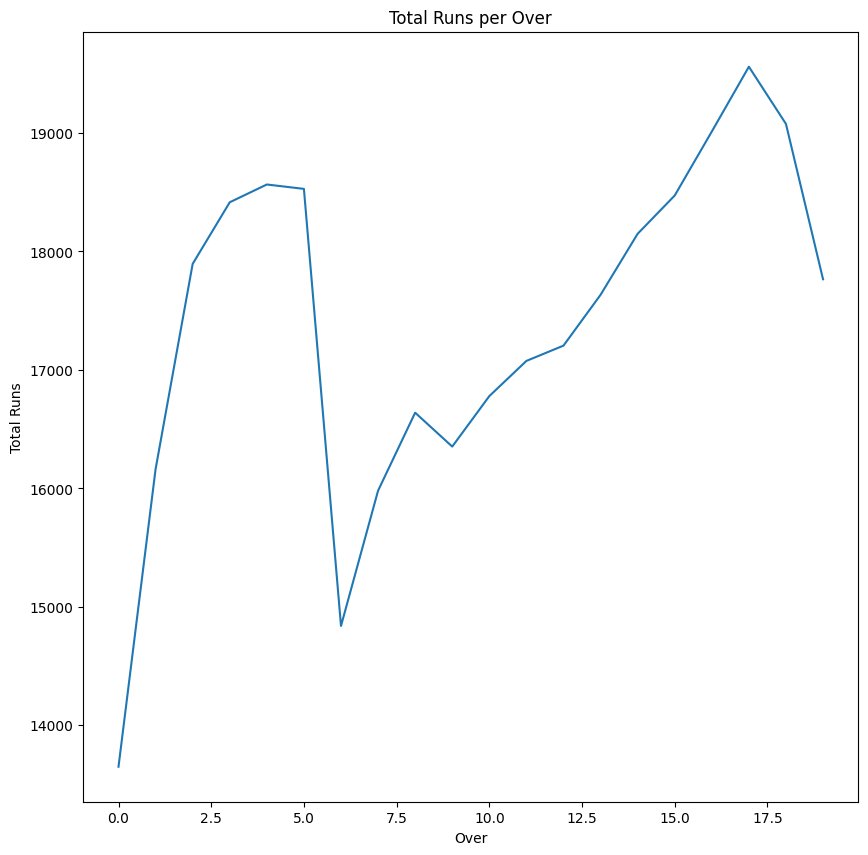

In [46]:
d_df['over']=d_df['over'].astype(int)
runs_per_over=d_df.groupby('over')['total_runs'].sum()
runs_per_over.plot(figsize=(10,10))
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.title("Total Runs per Over")
plt.show()

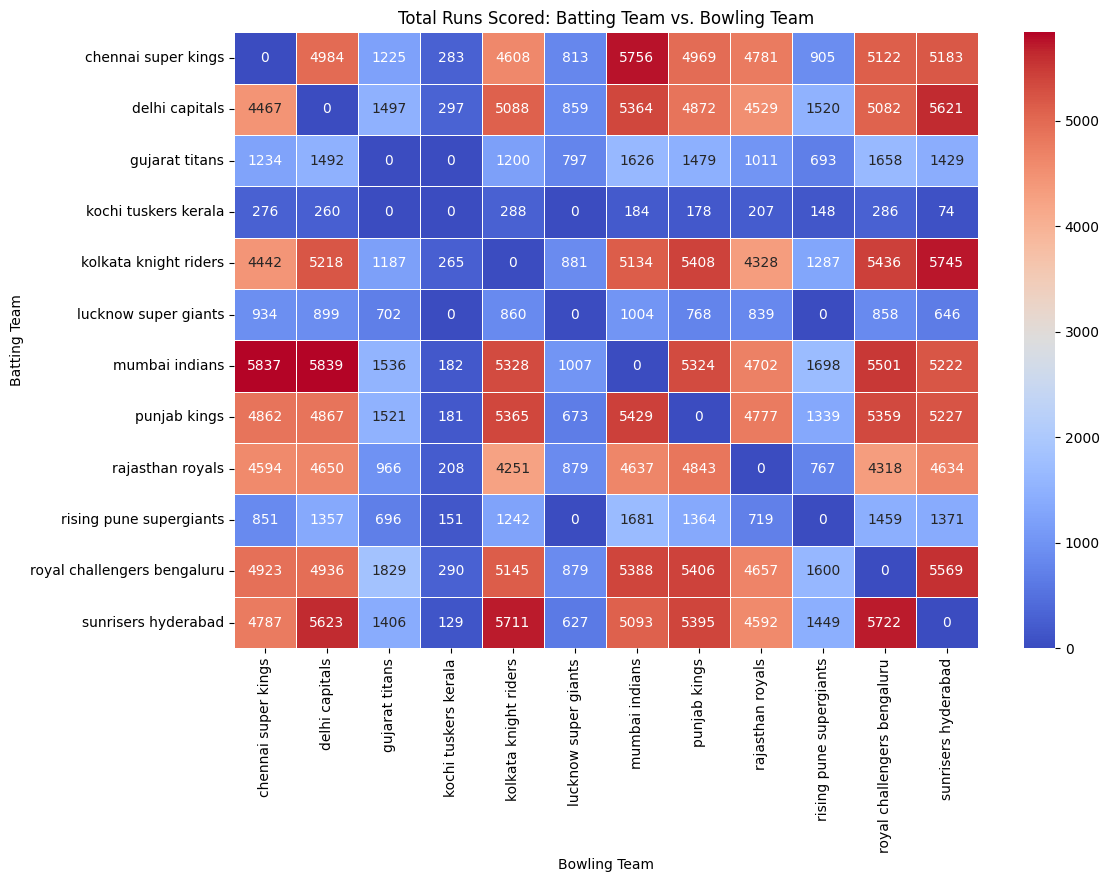

In [47]:
team_vs_team = d_df.pivot_table(
    values='total_runs', 
    index='batting_team', 
    columns='bowling_team', 
    aggfunc='sum', 
    fill_value=0
)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(team_vs_team, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5)
plt.title("Total Runs Scored: Batting Team vs. Bowling Team")
plt.xlabel("Bowling Team")
plt.ylabel("Batting Team")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

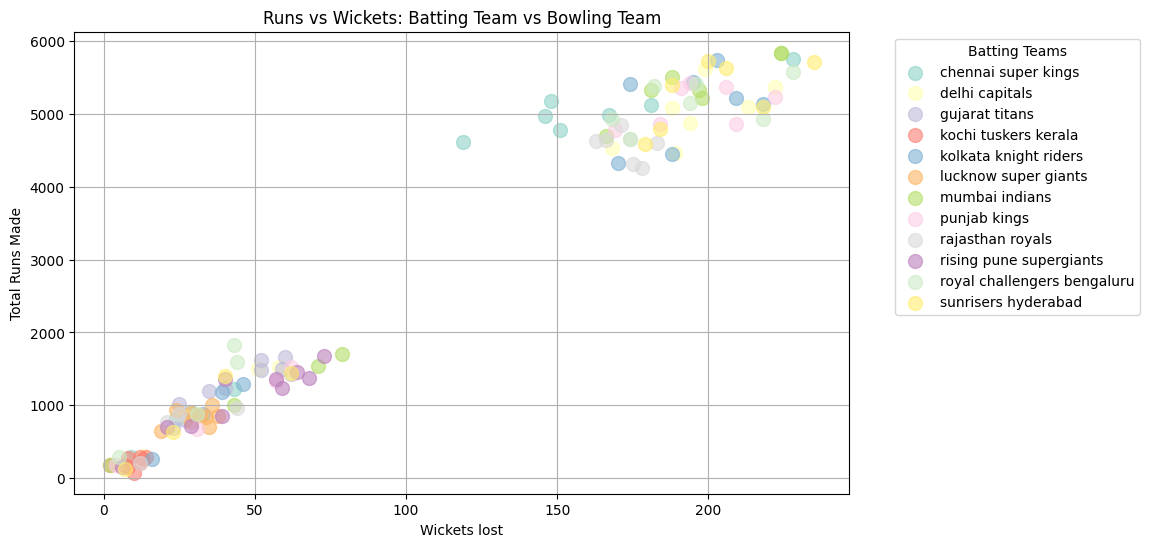

In [48]:
team_performance=d_df.groupby(['batting_team','bowling_team']).agg(total_runs=('total_runs','sum'), wickets=('is_wicket','sum')).reset_index()
colors=sns.color_palette("Set3", n_colors=len(team_performance['batting_team'].unique()))

plt.figure(figsize=(10, 6))
for idx, team in enumerate(team_performance['batting_team'].unique()):
    team_data=team_performance[team_performance['batting_team']==team]
    plt.scatter(team_data['wickets'], team_data['total_runs'], 
                label=team, s=100, alpha=0.6, color=colors[idx])

plt.title("Runs vs Wickets: Batting Team vs Bowling Team")
plt.xlabel("Wickets lost")
plt.ylabel("Total Runs Made")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Batting Teams')
plt.grid(True)
plt.show()

In [49]:
team_performance_sorted=team_performance.sort_values(by='total_runs',ascending=False)
team_performance_sorted.head(10)

,batting_team,bowling_team,total_runs,wickets
62,mumbai indians,delhi capitals,5839,224
61,mumbai indians,chennai super kings,5837,224
5,chennai super kings,mumbai indians,5756,228
51,kolkata knight riders,sunrisers hyderabad,5745,203
125,sunrisers hyderabad,royal challengers bengaluru,5722,200
119,sunrisers hyderabad,kolkata knight riders,5711,235
116,sunrisers hyderabad,delhi capitals,5623,206
21,delhi capitals,sunrisers hyderabad,5621,199
114,royal challengers bengaluru,sunrisers hyderabad,5569,228
70,mumbai indians,royal challengers bengaluru,5501,188


In [60]:
match_results=d_df.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
pivoted=match_results.pivot(index='match_id', columns='batting_team', values='total_runs')
pivoted['winner']=pivoted.idxmax(axis=1)
team_wins=pivoted['winner'].value_counts().reset_index()
team_wins.columns=['team','wins']
team_wins_sorted=team_wins.sort_values(by='wins',ascending=False)
team_wins_sorted

,team,wins
0,mumbai indians,144
1,chennai super kings,137
2,kolkata knight riders,130
3,royal challengers bengaluru,124
4,delhi capitals,119
5,sunrisers hyderabad,119
6,punjab kings,112
7,rajasthan royals,111
8,gujarat titans,42
9,rising pune supergiants,26


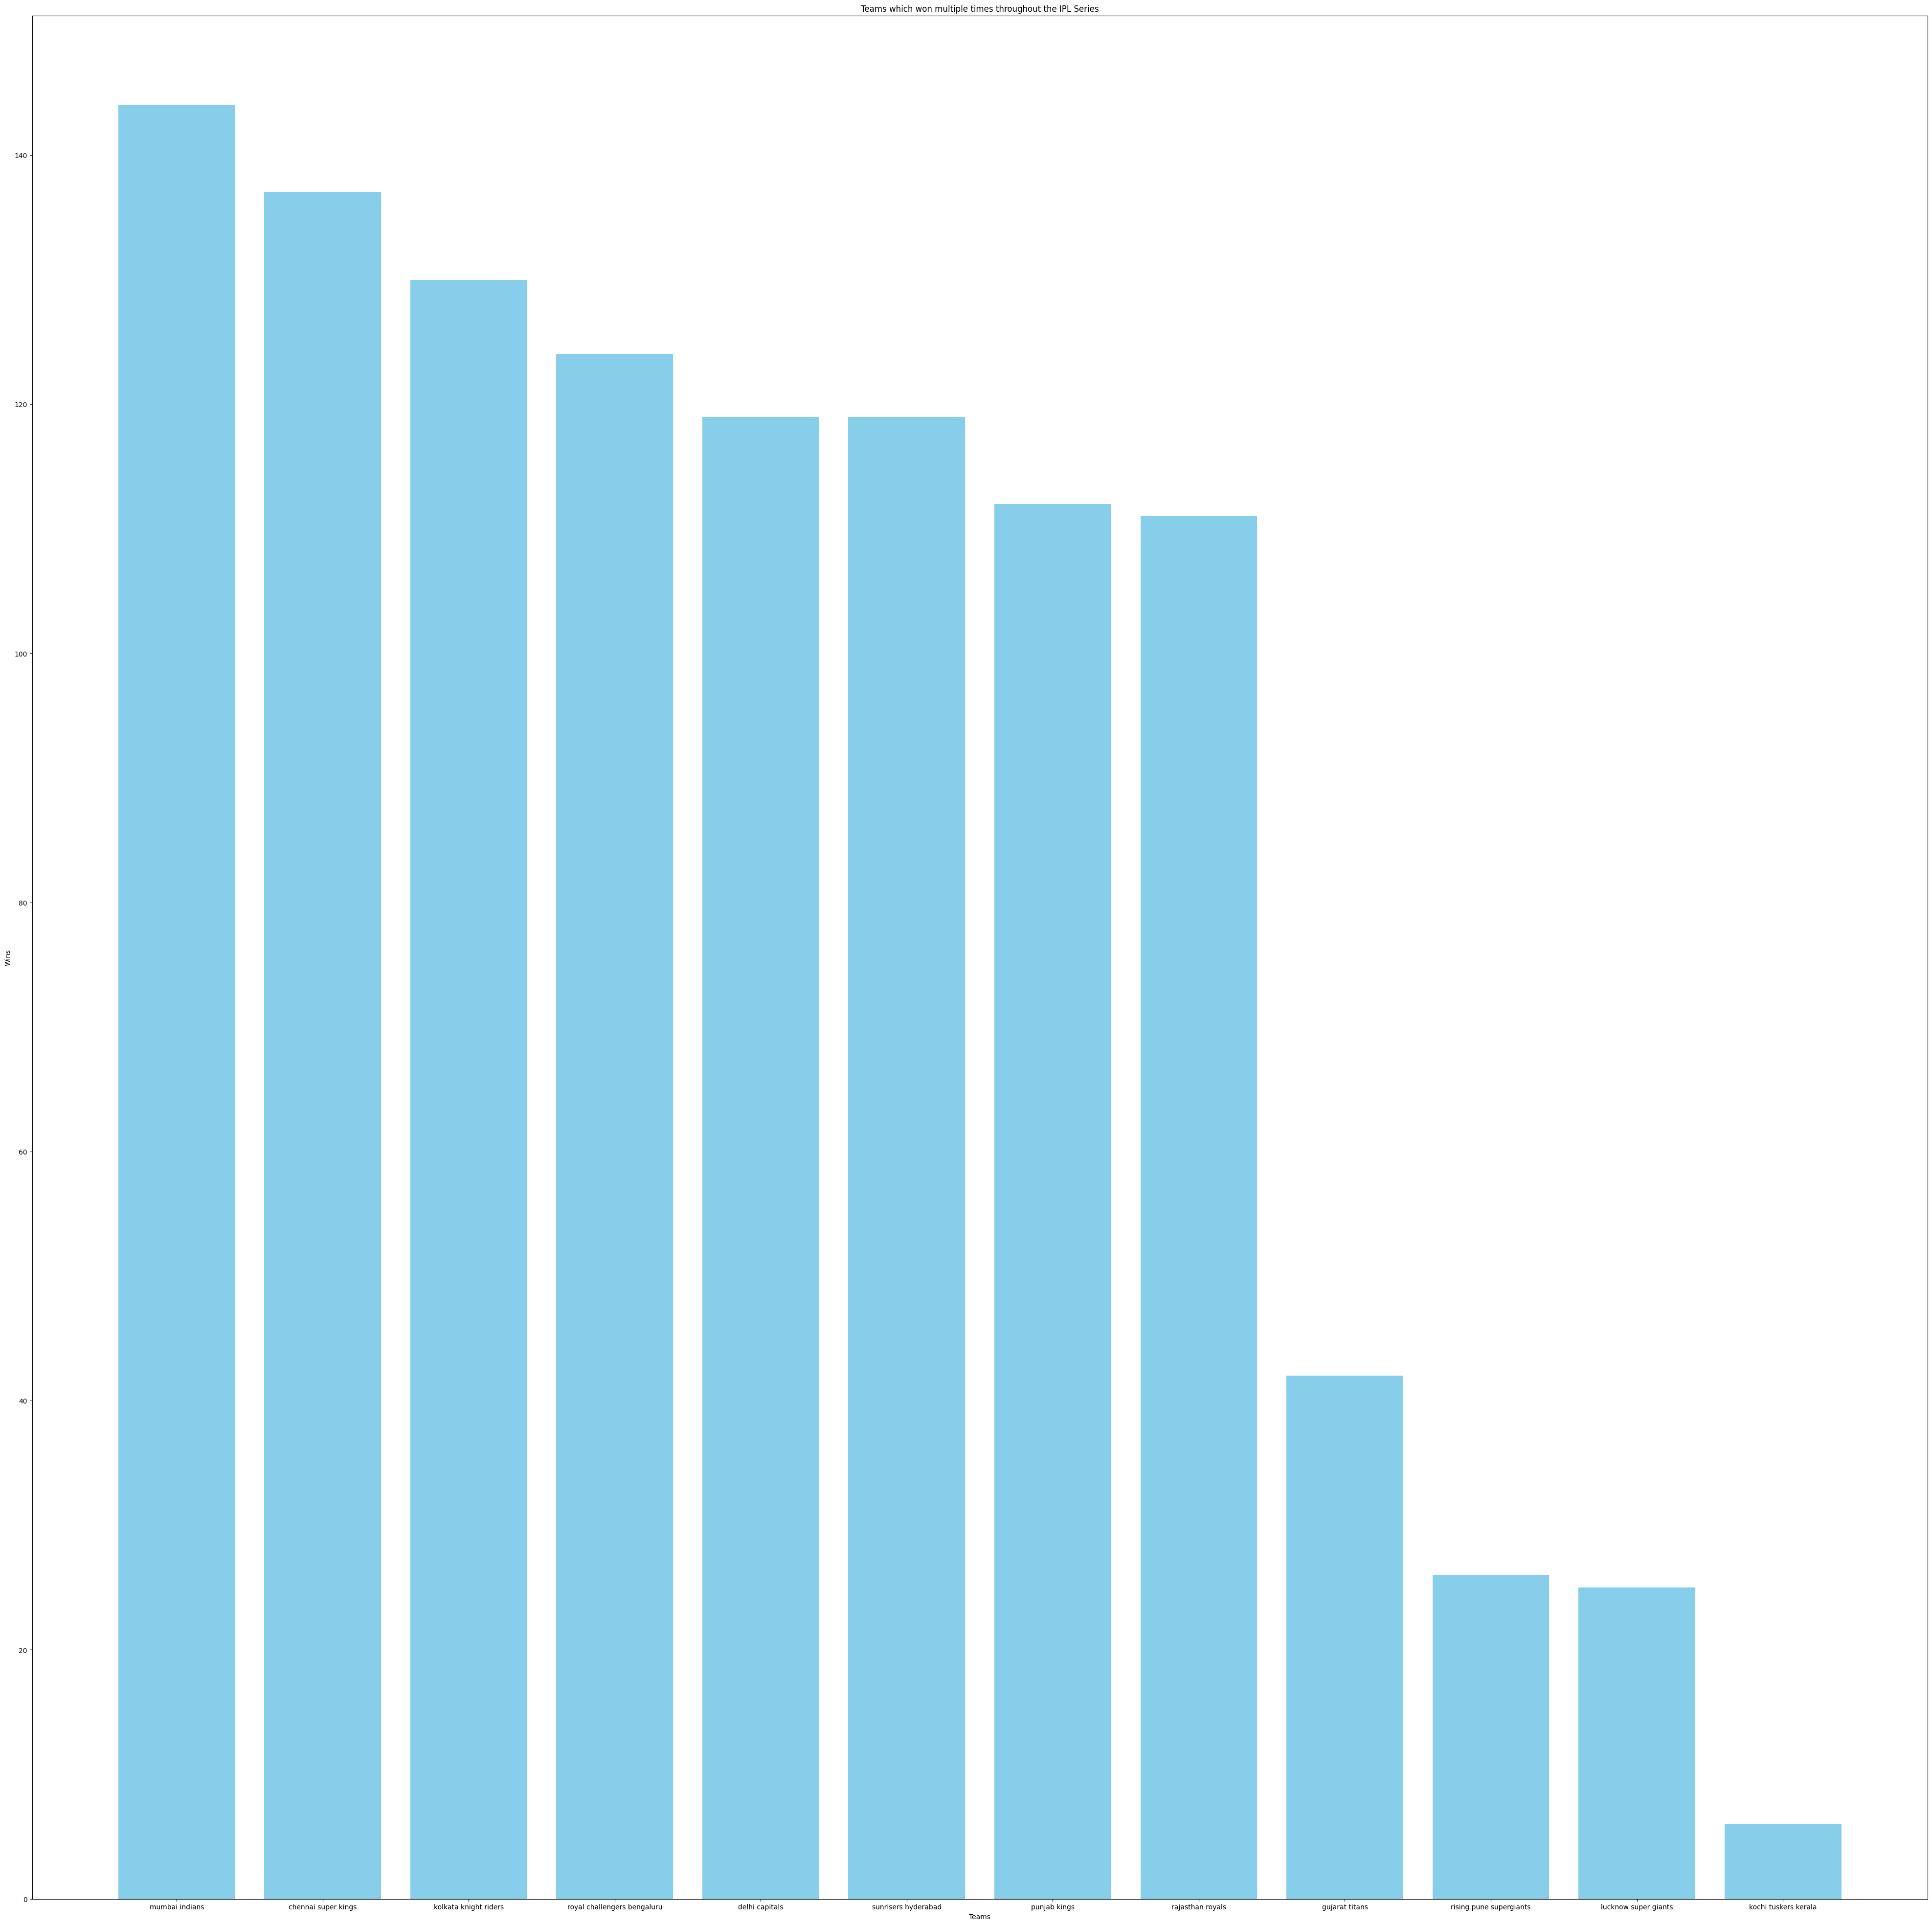

In [61]:
plt.figure(figsize=(50,50))
plt.bar(team_wins_sorted['team'],team_wins_sorted['wins'],color='skyblue')
plt.title('Teams which won multiple times throughout the IPL Series')
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.show()

In [62]:
features_to_drop = ['match_id', 'batter', 'bowler', 'player_dismissed', 'dismissal_kind', 'fielder']
d_df_cleaned = d_df.drop(columns=features_to_drop)

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d_df_cleaned['batting_team_encoded']=le.fit_transform(d_df_cleaned['batting_team'])
d_df_cleaned['bowling_team_encoded']=le.fit_transform(d_df_cleaned['bowling_team'])

In [64]:
d_df_cleaned=pd.get_dummies(d_df_cleaned,columns=['batting_team','bowling_team'])

In [65]:
d_df_cleaned.head()

,inning,over,ball,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,batting_team_encoded,...,bowling_team_gujarat titans,bowling_team_kochi tuskers kerala,bowling_team_kolkata knight riders,bowling_team_lucknow super giants,bowling_team_mumbai indians,bowling_team_punjab kings,bowling_team_rajasthan royals,bowling_team_rising pune supergiants,bowling_team_royal challengers bengaluru,bowling_team_sunrisers hyderabad
0,1,0,1,BB McCullum,0,1,1,legbyes,0,4,...,False,False,False,False,False,False,False,False,True,False
1,1,0,2,SC Ganguly,0,0,0,No Extra,0,4,...,False,False,False,False,False,False,False,False,True,False
2,1,0,3,SC Ganguly,0,1,1,wides,0,4,...,False,False,False,False,False,False,False,False,True,False
3,1,0,4,SC Ganguly,0,0,0,No Extra,0,4,...,False,False,False,False,False,False,False,False,True,False
4,1,0,5,SC Ganguly,0,0,0,No Extra,0,4,...,False,False,False,False,False,False,False,False,True,False


In [66]:
from sklearn.model_selection import train_test_split
d_df_cleaned=d_df.dropna(subset=['total_runs']) 

X=d_df_cleaned.drop(columns=['total_runs'])  
y=d_df_cleaned['total_runs'] 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data (X_train) shape: {X_train.shape}")
print(f"Testing data (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Testing target (y_test) shape: {y_test.shape}")

Training data (X_train) shape: (208736, 16)
Testing data (X_test) shape: (52184, 16)
Training target (y_train) shape: (208736,)
Testing target (y_test) shape: (52184,)


In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

categorical_columns=['batting_team', 'bowling_team', 'non_striker']  

label_encoder=LabelEncoder()
for col in categorical_columns:
    d_df[col]=label_encoder.fit_transform(d_df[col])

X=d_df.drop(columns=['total_runs'])  
y=d_df['total_runs']  

X=X.select_dtypes(include=['float64', 'int64']) 

model=RandomForestRegressor()
model.fit(X, y)
importances=model.feature_importances_
feature_importances=pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Feature Importances:\n", feature_importances)

Feature Importances:
         feature    importance
3  batsman_runs  9.577460e-01
4    extra_runs  4.225394e-02
0      match_id  1.452406e-08
1        inning  0.000000e+00
2          ball  0.000000e+00
5     is_wicket  0.000000e+00


In [68]:
from sklearn.preprocessing import StandardScaler

features=['batsman_runs']
target=['total_runs']

X_train=d_df[features]
y_train=d_df[target].to_numpy()
X_test=d_df[features]
y_test=d_df[target].to_numpy()

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [69]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
def run_model(model, X_train, y_train, X_test, y_test):
    start_time=time.time()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    roc=roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    time_taken=time.time()-start_time
    print(f"Accuracy:{accuracy:.5f}")
    print(f"ROC Curve:{roc:.5f}")
    print(f"Time Taken:{time_taken:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=5))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    plt.show()
    return model, accuracy, roc, time_taken

Accuracy:0.94262
ROC Curve:0.88328
Time Taken:5.3997
Classification Report:
              precision    recall  f1-score   support

           0    0.87010   1.00000   0.93054     90438
           1    0.99646   0.88929   0.93983    108440
           2    0.99647   0.94643   0.97081     17323
           3    0.00000   0.00000   0.00000       922
           4    0.96804   0.98332   0.97562     30221
           5    0.00000   0.00000   0.00000       524
           6    0.99333   1.00000   0.99666     12964
           7    0.00000   0.00000   0.00000        88

    accuracy                        0.94262    260920
   macro avg    0.60305   0.60238   0.60168    260920
weighted avg    0.94336   0.94262   0.94011    260920



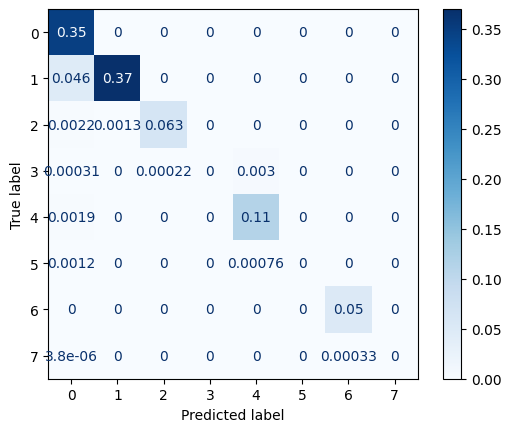

(LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga'),
 0.9426222596964586,
 0.883284133333995,
 5.399675130844116)

In [70]:
from sklearn.linear_model import LogisticRegression
params_lr={'penalty':'elasticnet','l1_ratio':0.5, 'solver':'saga'}
model=LogisticRegression(**params_lr)
run_model(model, X_train, y_train, X_test, y_test)

Accuracy:0.94262
ROC Curve:0.89088
Time Taken:0.4689
Classification Report:
              precision    recall  f1-score   support

           0    0.87010   1.00000   0.93054     90438
           1    0.99646   0.88929   0.93983    108440
           2    0.99647   0.94643   0.97081     17323
           3    0.00000   0.00000   0.00000       922
           4    0.96804   0.98332   0.97562     30221
           5    0.00000   0.00000   0.00000       524
           6    0.99333   1.00000   0.99666     12964
           7    0.00000   0.00000   0.00000        88

    accuracy                        0.94262    260920
   macro avg    0.60305   0.60238   0.60168    260920
weighted avg    0.94336   0.94262   0.94011    260920



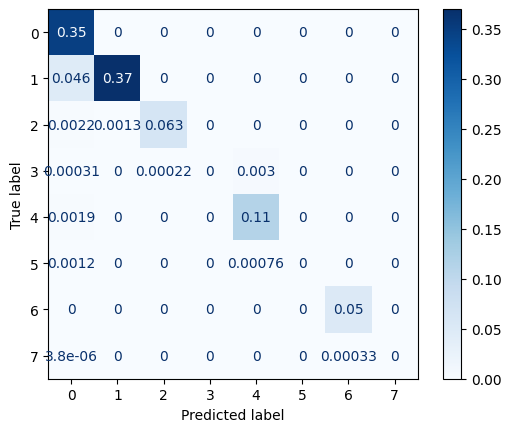

(GaussianNB(), 0.9426222596964586, 0.8908839791743913, 0.46893978118896484)

In [71]:
from sklearn.naive_bayes import GaussianNB
params_nb={}
model=GaussianNB(**params_nb)
run_model(model, X_train, y_train, X_test, y_test)

Accuracy:0.94586
ROC Curve:0.95505
Time Taken:0.3438
Classification Report:
              precision    recall  f1-score   support

           0    0.87010   1.00000   0.93054     90438
           1    0.99646   0.88929   0.93983    108440
           2    0.99647   0.94643   0.97081     17323
           3    0.99872   0.84816   0.91730       922
           4    0.99551   0.98329   0.98936     30221
           5    1.00000   0.12405   0.22071       524
           6    0.99333   1.00000   0.99666     12964
           7    0.00000   0.00000   0.00000        88

    accuracy                        0.94586    260920
   macro avg    0.85632   0.72390   0.74565    260920
weighted avg    0.95207   0.94586   0.94539    260920



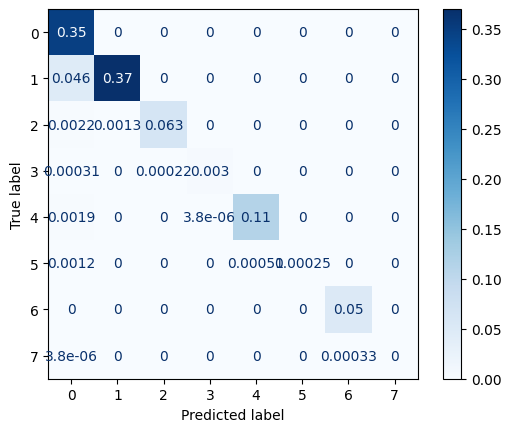

(DecisionTreeClassifier(max_depth=12, max_features='sqrt'),
 0.9458646328376514,
 0.9550522991127054,
 0.3437802791595459)

In [72]:
from sklearn.tree import DecisionTreeClassifier
params_dt={'max_depth':12,
           'max_features':'sqrt'}
model=DecisionTreeClassifier(**params_dt)
run_model(model, X_train, y_train, X_test, y_test)

Accuracy:0.94262
ROC Curve:0.89088
Time Taken:0.4628
Classification Report:
              precision    recall  f1-score   support

           0    0.87010   1.00000   0.93054     90438
           1    0.99646   0.88929   0.93983    108440
           2    0.99647   0.94643   0.97081     17323
           3    0.00000   0.00000   0.00000       922
           4    0.96804   0.98332   0.97562     30221
           5    0.00000   0.00000   0.00000       524
           6    0.99333   1.00000   0.99666     12964
           7    0.00000   0.00000   0.00000        88

    accuracy                        0.94262    260920
   macro avg    0.60305   0.60238   0.60168    260920
weighted avg    0.94336   0.94262   0.94011    260920



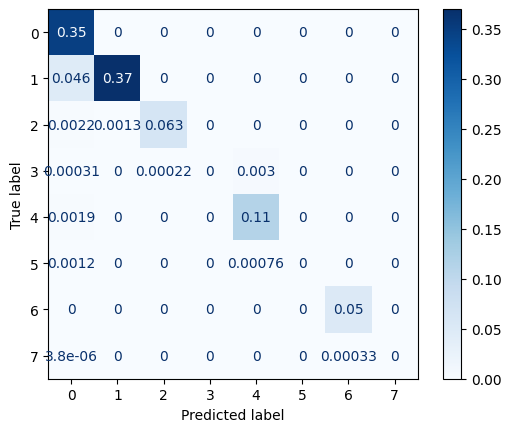

(GaussianNB(), 0.9426222596964586, 0.8908839791743913, 0.46277952194213867)

In [73]:
from sklearn.naive_bayes import MultinomialNB
model=GaussianNB()
run_model(model, X_train, y_train, X_test, y_test)

Accuracy:0.94586
ROC Curve:0.95505
Time Taken:8.1378
Classification Report:
              precision    recall  f1-score   support

           0    0.87010   1.00000   0.93054     90438
           1    0.99646   0.88929   0.93983    108440
           2    0.99647   0.94643   0.97081     17323
           3    0.99872   0.84816   0.91730       922
           4    0.99551   0.98329   0.98936     30221
           5    1.00000   0.12405   0.22071       524
           6    0.99333   1.00000   0.99666     12964
           7    0.00000   0.00000   0.00000        88

    accuracy                        0.94586    260920
   macro avg    0.85632   0.72390   0.74565    260920
weighted avg    0.95207   0.94586   0.94539    260920



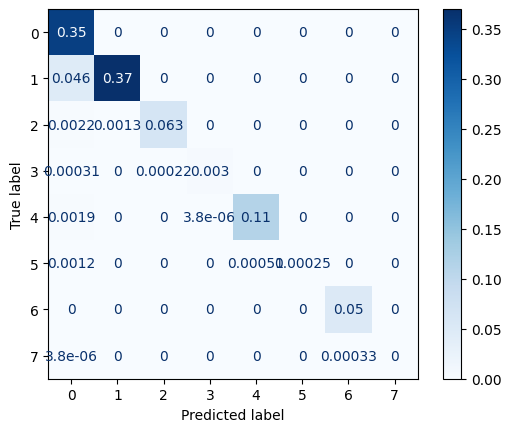

(RandomForestClassifier(),
 0.9458646328376514,
 0.9550522991127054,
 8.13780164718628)

In [74]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
run_model(model, X_train, y_train, X_test, y_test)

Accuracy:0.94586
ROC Curve:0.95505
Time Taken:4.7031
Classification Report:
              precision    recall  f1-score   support

           0    0.87010   1.00000   0.93054     90438
           1    0.99646   0.88929   0.93983    108440
           2    0.99647   0.94643   0.97081     17323
           3    0.99872   0.84816   0.91730       922
           4    0.99551   0.98329   0.98936     30221
           5    1.00000   0.12405   0.22071       524
           6    0.99333   1.00000   0.99666     12964
           7    0.00000   0.00000   0.00000        88

    accuracy                        0.94586    260920
   macro avg    0.85632   0.72390   0.74565    260920
weighted avg    0.95207   0.94586   0.94539    260920



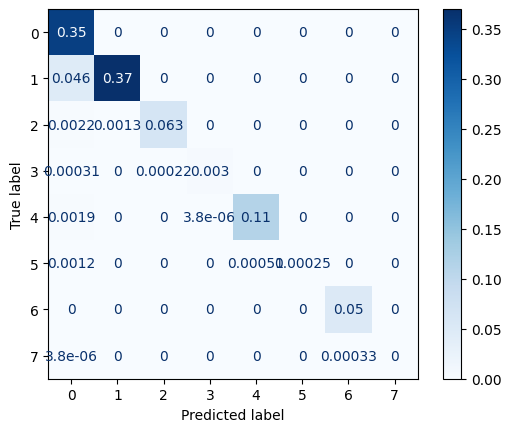

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 0.9458646328376514,
 0.9550522991127055,
 4.703130006790161)

In [75]:
import xgboost as xgb
from xgboost import XGBClassifier
model=xgb.XGBClassifier()
run_model(model, X_train, y_train, X_test, y_test)

Accuracy:0.94262
ROC Curve:0.95335
Time Taken:14.0541
Classification Report:
              precision    recall  f1-score   support

           0    0.87010   1.00000   0.93054     90438
           1    0.99646   0.88929   0.93983    108440
           2    0.99647   0.94643   0.97081     17323
           3    0.00000   0.00000   0.00000       922
           4    0.96804   0.98332   0.97562     30221
           5    0.00000   0.00000   0.00000       524
           6    0.99333   1.00000   0.99666     12964
           7    0.00000   0.00000   0.00000        88

    accuracy                        0.94262    260920
   macro avg    0.60305   0.60238   0.60168    260920
weighted avg    0.94336   0.94262   0.94011    260920



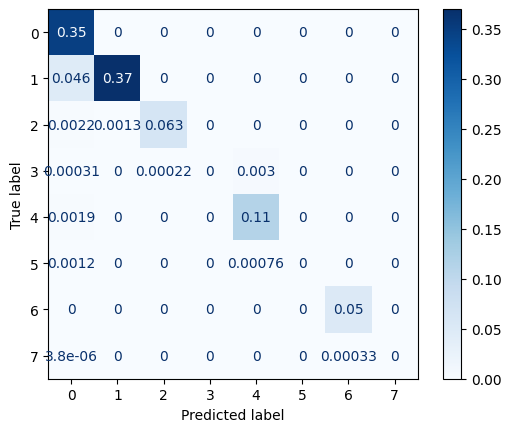

(AdaBoostClassifier(),
 0.9426222596964586,
 0.9533532538845468,
 14.054063558578491)

In [76]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
run_model(model, X_train, y_train, X_test, y_test)

Accuracy:0.94586
ROC Curve:0.95502
Time Taken:29.0138
Classification Report:
              precision    recall  f1-score   support

           0    0.87010   1.00000   0.93054     90438
           1    0.99646   0.88929   0.93983    108440
           2    0.99647   0.94643   0.97081     17323
           3    0.99872   0.84816   0.91730       922
           4    0.99551   0.98329   0.98936     30221
           5    1.00000   0.12405   0.22071       524
           6    0.99333   1.00000   0.99666     12964
           7    0.00000   0.00000   0.00000        88

    accuracy                        0.94586    260920
   macro avg    0.85632   0.72390   0.74565    260920
weighted avg    0.95207   0.94586   0.94539    260920



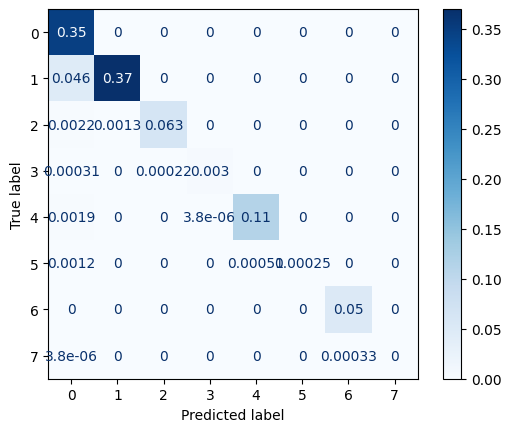

(MLPClassifier(), 0.9458646328376514, 0.9550204674212898, 29.013784170150757)

In [77]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
run_model(model, X_train, y_train, X_test, y_test)

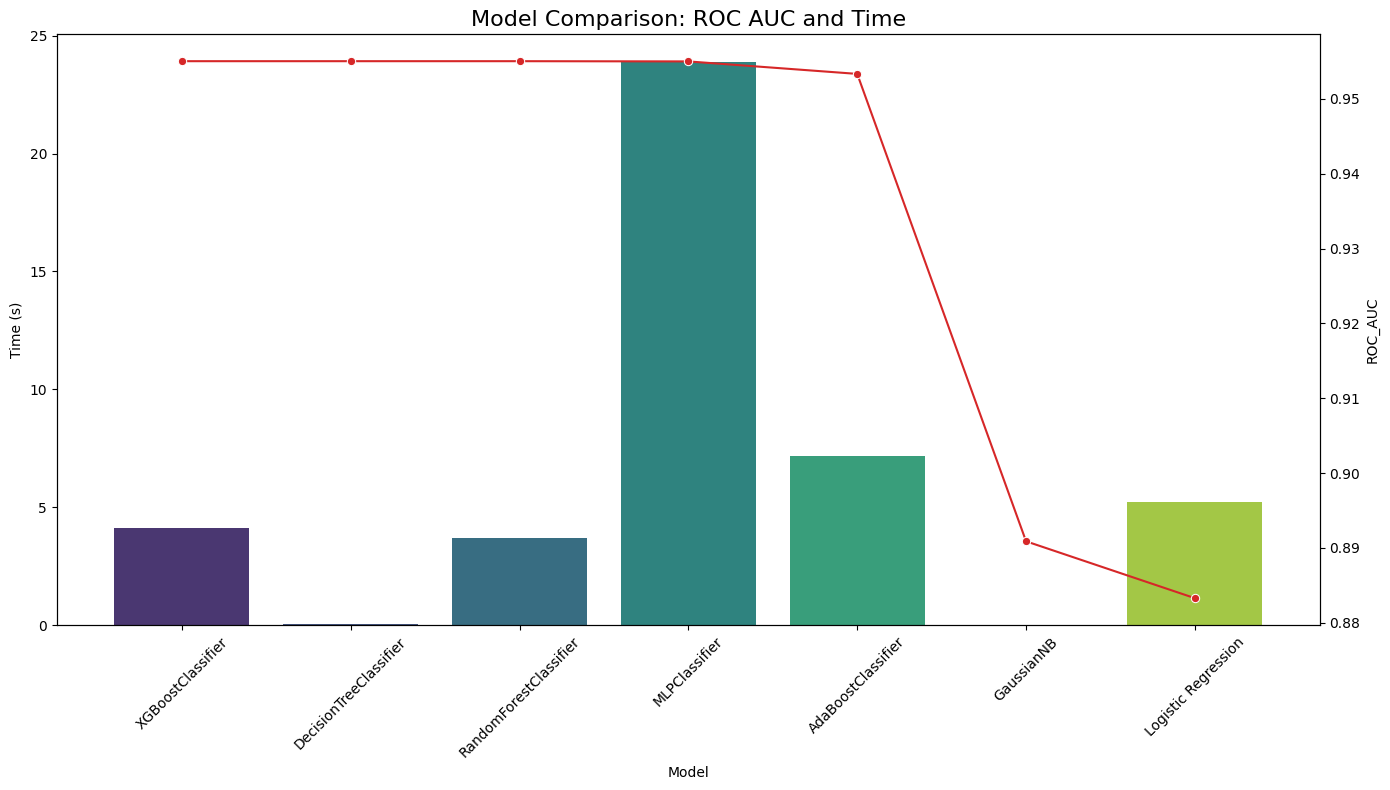

In [80]:
scaler=StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
models = [
    ('Logistic Regression', LogisticRegression()), ('GaussianNB', GaussianNB()), ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()), ('MLPClassifier', MLPClassifier(max_iter=500)),
    ('XGBoostClassifier', XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)), ('AdaBoostClassifier', AdaBoostClassifier())
]

results=[]
for name, model in models:
    start_time=time.time()
    model.fit(X_train_scaled, y_train)  
    training_time=time.time() - start_time
    roc_auc=roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr') 
    results.append({'Model': name, 'Time (s)': training_time, 'ROC_AUC': roc_auc})

data=pd.DataFrame(results).sort_values('ROC_AUC', ascending=False)

fig, ax1=plt.subplots(figsize=(14, 8))
sns.barplot(x='Model', y='Time (s)', data=data, palette='viridis', ax=ax1)
ax1.set_title('Model Comparison: ROC AUC and Time', fontsize=16)
ax2=ax1.twinx()
sns.lineplot(x='Model', y='ROC_AUC', data=data, color='tab:red', marker='o', ax=ax2)
ax1.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()